## **Import relevant libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [5]:
#uploading the data
df = pd.read_csv('spotify-2023.csv',encoding = 'latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
#checking the description
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
#viewing the dataset
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##**Cleaning the dataset**

In [8]:
df_new = df[df['released_year'] >= 2020]

In [9]:
print(f"Number of column: {df_new.shape[1]}\nNumber of rows: {df_new.shape[0]}")

Number of column: 24
Number of rows: 733


In [10]:
df_new.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        27
bpm                      0
key                     76
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [11]:
#dropping rows with missing values
df_new.dropna(axis='rows')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [12]:
df_new.rename(columns={'danceability_%': 'Danceability',
                       'valence_%': 'Valence',
                       'energy_%': 'Energy',
                       'acousticness_%': 'Acousticness',
                       'instrumentalness_%': 'Instrumentalness',
                       'liveness_%': 'Liveness',
                       'speechiness_%': 'Speechiness'}, inplace=True)

df_new.drop(['in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',],axis=1,inplace=True)

df_new


<ipython-input-12-c05bf6cf441b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-c05bf6cf441b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5


In [13]:
df.duplicated().sum()

0

In [14]:
total_artists = df_new['artist(s)_name'].nunique()
print(f"total number of artists = {total_artists}")

total number of artists = 503


In [15]:
artist_counts = df_new['artist(s)_name'].value_counts()
artist_counts

artist(s)_name
Taylor Swift                  26
Bad Bunny                     19
SZA                           19
The Weeknd                    17
Harry Styles                  13
                              ..
Fuerza Regida, Chino Pacas     1
Melanie Martinez               1
Zach Bryan                     1
Marï¿½ï¿½lia Mendo             1
Feid, Sech, Jhayco             1
Name: count, Length: 503, dtype: int64

## **General Information**

In [30]:

new_var1 = [
    '#FF6F61',  # Coral
    '#6B5B95',  # Purple
    '#88B04B',  # Olive Green
    '#F7CAC9',  # Soft Pink
    '#92A8D1',  # Soft Blue
    '#955251',  # Brick Red
    '#B565A7',  # Mauve
    '#009B77',  # Sea Green
    '#DD4124',  # Fiery Red
    '#F3722C',  # Orange
    '#45B8AC',  # Turquoise
    '#8E44AD',  # Purple
    '#DFCFBE',  # Beige
    '#55B4B0',  # Medium Turquoise
    '#E15D44',  # Vermilion
    '#7FCDCD',  # Pale Cyan
    '#BC243C',  # Strong Red
    '#C3447A'   # Raspberry
]
new_var0 = new_var1
new_var = new_var0
color_sequence = new_var

fig = px.bar(artist_counts[:15],
             text_auto = True,
             color = artist_counts[:15].index,
             color_discrete_sequence = color_sequence,
             labels=dict(index="Artist Names",value="Count"),
             title = 'Top 15 Artists with Most Songs(2020-2023)'
            )

fig.update_layout(template='plotly_white')

fig.show()

In [17]:
Top_songs = df_new[['track_name','streams']]
Top_songs['streams'] = pd.to_numeric(Top_songs['streams'], errors='coerce')

Top = Top_songs[['track_name','streams']].sort_values(by = 'streams', ascending= False).head(10)
Top

<ipython-input-17-e841794aef0b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,streams
84,STAY (with Justin Bieber),2665343922
71,Heat Waves,2557975762
14,As It Was,2513188493
513,good 4 u,1887039593
535,drivers license,1858144199
410,INDUSTRY BABY (feat. Jack Harlow),1814349763
433,Levitating (feat. DaBaby),1802514301
555,Dakiti,1763363713
519,MONTERO (Call Me By Your Name),1735441776
584,Mood (feat. Iann Dior),1699402402


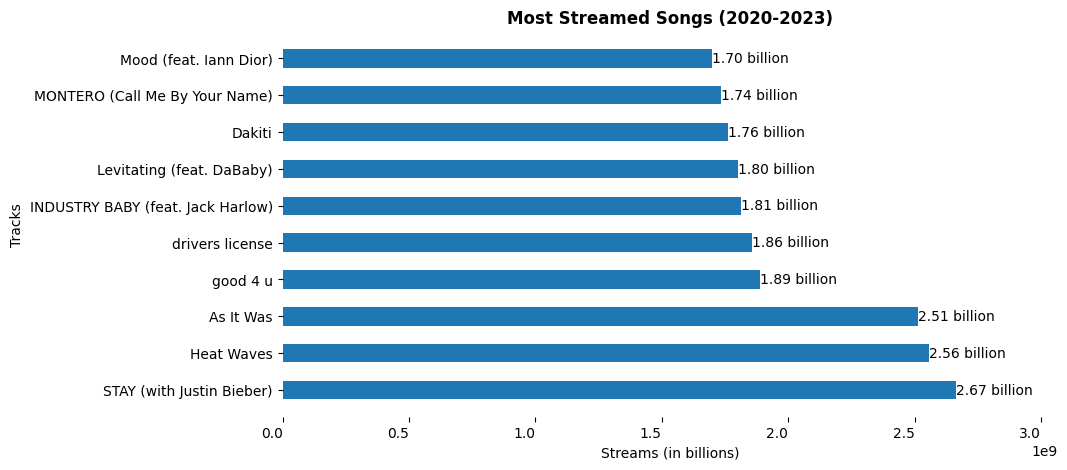

In [18]:

top_10_streams = Top_songs.nlargest(10, 'streams')
fig, ax = plt.subplots(figsize=(10, 5))

bar_container = ax.barh(top_10_streams['track_name'], top_10_streams['streams'], height=0.5);
ax.set(xlabel='Streams (in billions)', ylabel='Tracks', title='Most Streamed Songs (2020-2023)')
ax.title.set_weight('bold')

plt.xticks(ha='right')
ax.margins(x=0.15)

for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)

ax.bar_label(bar_container, fmt=lambda x: f'{x / 10**9:.2f} billion')
plt.show()

## **Scatter Plot**

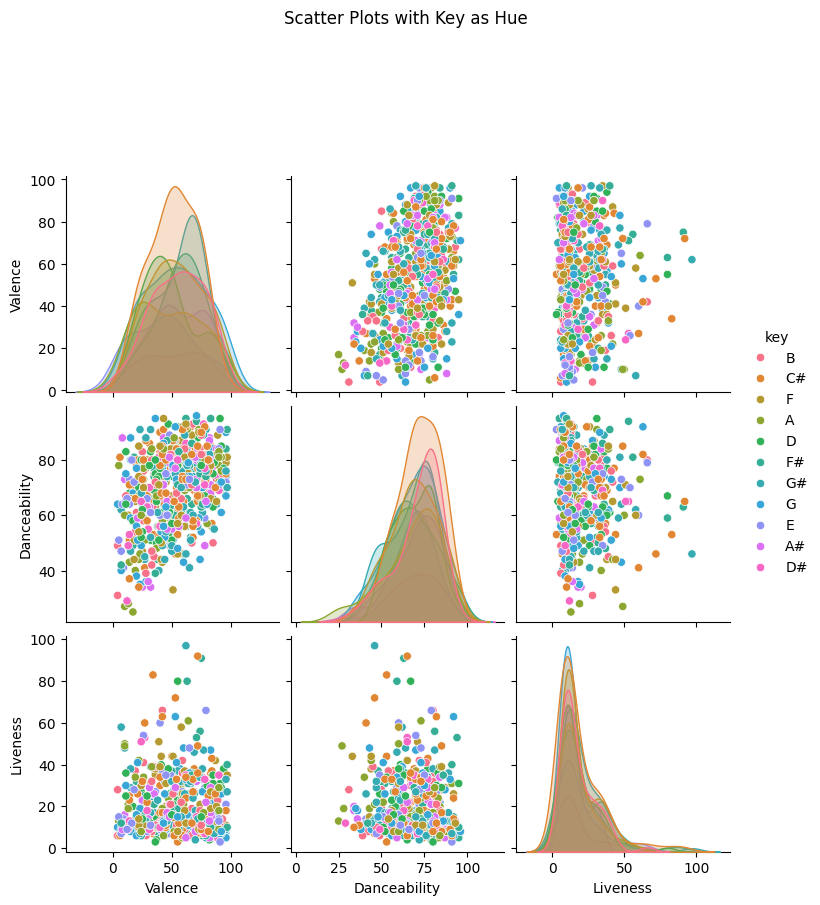

In [33]:
sns.pairplot(df_new[['Valence', 'Danceability', 'Liveness', 'streams', 'key']], hue='key')
plt.suptitle('Scatter Plots with Key as Hue',fontweight='normal', y=1.2)
plt.show()

In [22]:

features = ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']
X = df_new[features]
y = df_new['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model R^2 Score: {r2_score(y_test, y_pred)}")

feature_importance = pd.DataFrame(model.coef_, index=features, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
feature_importance.index.name='Features'
print(feature_importance)


Model R^2 Score: 0.00978172284132961
                   Coefficient
Features                      
Danceability      4.076383e+05
Valence           1.154388e+05
Liveness         -1.349690e+05
Acousticness     -5.330259e+05
Energy           -7.683430e+05
Speechiness      -2.801440e+06
Instrumentalness -3.169563e+06


the model's low R^2 score suggests that the selected features (Danceability, Valence, Liveness, Acousticness, Energy, Speechiness, Instrumentalness) collectively explain only a small portion of the variance in Spotify Streams. The coefficients indicate the relative importance and direction of influence of each feature on the predicted outcome (Spotify Streams). Therefore, while these features do have some impact on streaming success according to the model, there are likely other factors not considered by this model that also play significant roles.

In [24]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                  Importance
Valence             0.180446
Danceability        0.174324
Liveness            0.171271
Acousticness        0.169533
Energy              0.158020
Speechiness         0.125215
Instrumentalness    0.021191


Based on these feature importances:

Valence, Danceability, Liveness, Acousticness, Energy, and Speechiness are the most influential features in predicting Spotify streams, according to the Random Forest model.
Instrumentalness has the least importance in this model, indicating that its presence or absence has the least impact on the prediction of streaming success.
